In [1]:
#### Advance Regression using regularization- HousePricePrediction:Australian Market

**Dataset**
Please find the dataset link <u>here</u>
Data Dictionary also provided
<img>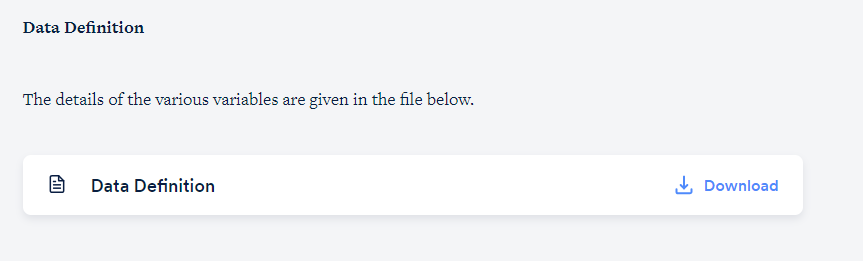</imh>

 
**The company is looking at prospective properties to buy to enter the market.**
You are required to **build a regression model using regularisation** in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 <u>The company wants to know:</u>

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

 
<u> **Determine the optimal value of lambda for ridge and lasso  regression.**</u>

 


#### **Problem statement**


**A US-based housing company named Surprise Housing has decided to enter the Australian market.**
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
Downloads


### Business Goal 

1. You are required to model the price of houses with the available independent variables. 
2. This model will then be used by the management to understand how exactly the prices vary with the variables.

### Importing Libraries

In [2]:
pip install matplotlib

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import numpy as np 
import sklearn as sk
import seaborn as sns







In [4]:
### Libraries Explanation


1.**pandas-nonNumeric-values**

- **we can not use any mathematical operations with such Data**

2.**numpy is used for numerical Data manipulation**.                                                    
- **We Can use mathematical operation with such Data**                                                     

3.**seaborn and matplotlib** 
  - **libraries for Data-visualisation**

  ### <u>Data Analysis</u>
     
- Data_Understanding
- Data_Preparation/Cleaning
- Understand stastical_information
- Understand Standard_information
- Data structure_info

## Loading dataset





#### Information about data (stasticalinfo)
- count
- mean
- standardeviation
- min
- 25%values in Data
- 50% values in Data
- 75% values in Data
- maximum_values

In [5]:
Data=pd.read_csv('train.csv')
Data=Data.drop(columns=['LotFrontage','Alley','PoolQC','Fence','MiscFeature','ScreenPorch','3SsnPorch','PoolArea'])
Df=pd.DataFrame(Data)
print(Df)


        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... PavedDrive WoodDeckSF OpenPorchSF  \
0       AllPub    Inside       Gtl  ...          Y        

In [6]:

Data.describe() 

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,15500.000000,12.000000,2010.000000,755000.000000


**For standard information about data**

In [7]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [8]:
Data.shape

(1460, 73)

In [9]:
#### Checking and removing outliers

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

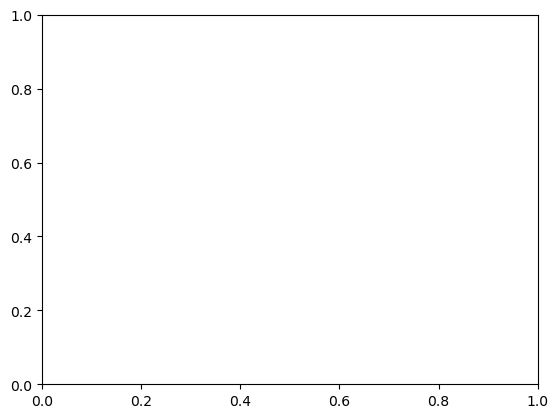

In [10]:

Data['SalePrice']=Data['SalePrice']<300000
plt.boxplot(Data) 
plt.show()


In [ ]:

plt.title("SaleCondition vs Salesprice")
plt.xlabel("SaleCondition",fontweight='bold')
plt.ylabel("SalePrice",fontweight='bold')
plt.scatter(Df['SaleCondition'],Df['SalePrice'])
plt.show()



In [ ]:

## From graph Above, I can conclude:
- SalesCondition 
Normal has max Salesprice


In [ ]:
x=Df['MSZoning']
y= Df['SalePrice']
plt.title("MS Zoning vs Salesprice")
plt.xlabel("MSZoning",fontweight='bold')
plt.ylabel("SalePrice",fontweight='bold')
plt.scatter(x,y)
plt.show()

## From This Scatter Plot,
##### We can conclude that 

- **Low density residential(RL) areas having more saleprice**
- **This means MSZoning directly impacting Salesprice**



**Factors impacting on salesprice:**
1. **SaleCondition**
2. **MSZoning**